Total number of matrices: 9963
File with largest dimensions: binary_matrix_2198.npy with dimensions (47, 423)
File with smallest dimensions: binary_matrix_8037.npy with dimensions (5, 33)
File with the largest width: binary_matrix_6818.npy with width 16528
File with the largest height: binary_matrix_2198.npy with height 47


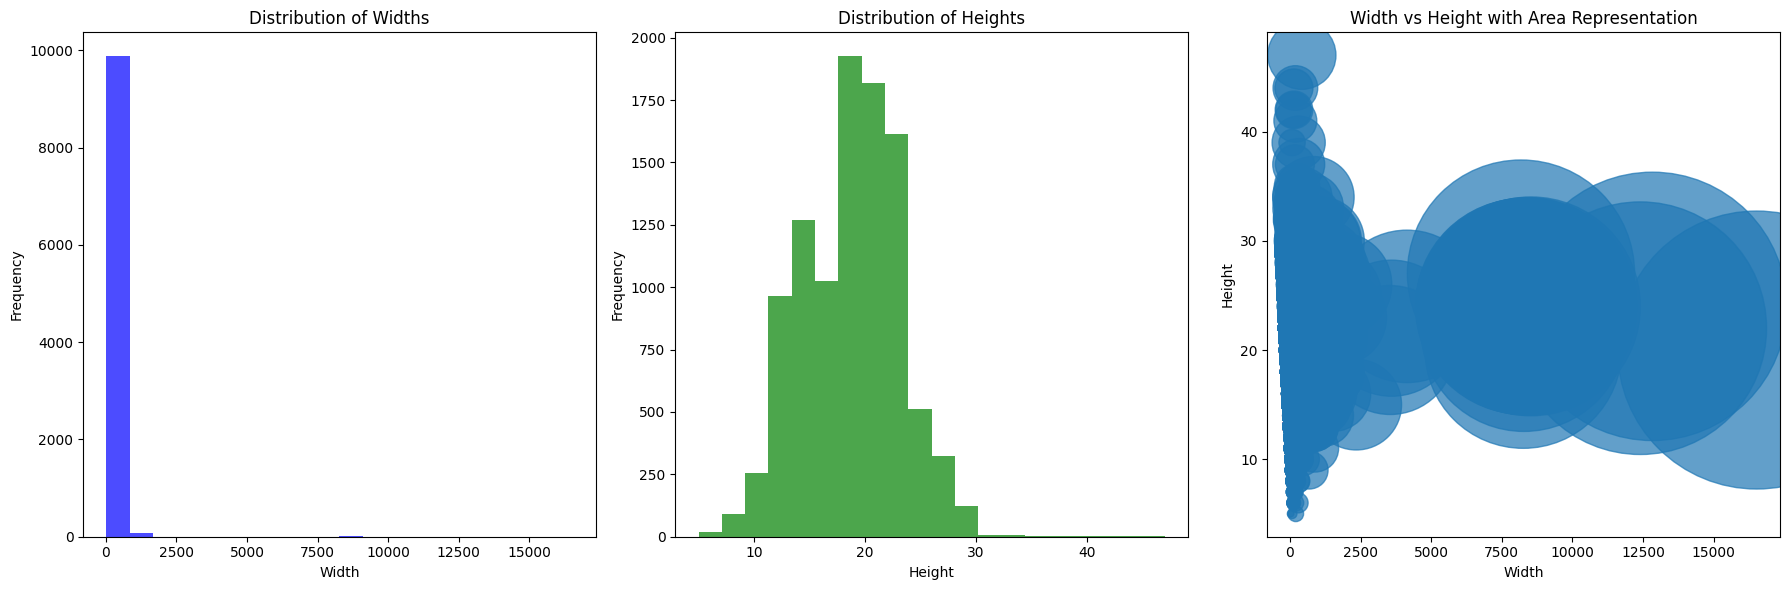

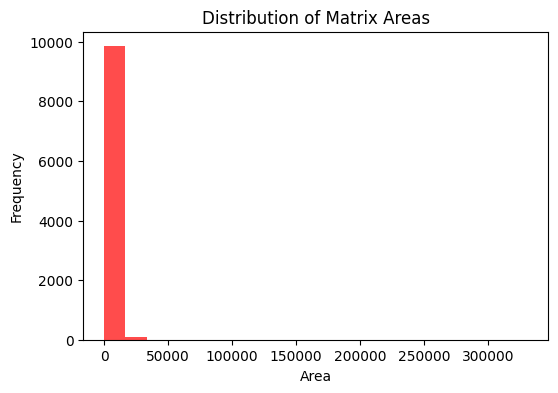

In [7]:
import numpy as np
import os
import matplotlib.pyplot as plt

np_convert_dir = 'irish_binary_auto2'
# Lists to store dimension and area data
dimension_data = []
area_data = []
file_names = []

# Variables to track maximum width and height
max_width = max_height = 0
max_width_file = max_height_file = ''

for file in os.listdir(np_convert_dir):
    if file.endswith('.npy'):
        file_path = os.path.join(np_convert_dir, file)
        matrix = np.load(file_path)
        dimension_data.append(matrix.shape)
        area_data.append(matrix.shape[0] * matrix.shape[1])  # Calculate area and store
        file_names.append(file)

        # Check for maximum width and height
        if matrix.shape[1] > max_width:
            max_width = matrix.shape[1]
            max_width_file = file
        if matrix.shape[0] > max_height:
            max_height = matrix.shape[0]
            max_height_file = file

# Determine the file with the largest and smallest dimensions
max_dim = max(dimension_data)
min_dim = min(dimension_data)
max_dim_file = file_names[dimension_data.index(max_dim)]
min_dim_file = file_names[dimension_data.index(min_dim)]

# Total number of matrices
total_matrices = len(dimension_data)

print(f"Total number of matrices: {total_matrices}")
print(f"File with largest dimensions: {max_dim_file} with dimensions {max_dim}")
print(f"File with smallest dimensions: {min_dim_file} with dimensions {min_dim}")
print(f"File with the largest width: {max_width_file} with width {max_width}")
print(f"File with the largest height: {max_height_file} with height {max_height}")

# Plotting
widths = [dim[1] for dim in dimension_data]
heights = [dim[0] for dim in dimension_data]

plt.figure(figsize=(18, 6))

# Histogram of widths and heights
plt.subplot(1, 3, 1)
plt.hist(widths, bins=20, color='blue', alpha=0.7)
plt.title('Distribution of Widths')
plt.xlabel('Width')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(heights, bins=20, color='green', alpha=0.7)
plt.title('Distribution of Heights')
plt.xlabel('Height')
plt.ylabel('Frequency')

# Scatter plot of widths vs heights with area representation
plt.subplot(1, 3, 3)
area_sizes = [20 * (area / min(area_data)) for area in area_data]  # Scale area for visibility
plt.scatter(widths, heights, s=area_sizes, alpha=0.7)
plt.title('Width vs Height with Area Representation')
plt.xlabel('Width')
plt.ylabel('Height')

plt.tight_layout()
plt.show()

# Histogram of Areas
plt.figure(figsize=(6, 4))
plt.hist(area_data, bins=20, color='red', alpha=0.7)
plt.title('Distribution of Matrix Areas')
plt.xlabel('Area')
plt.ylabel('Frequency')
plt.show()


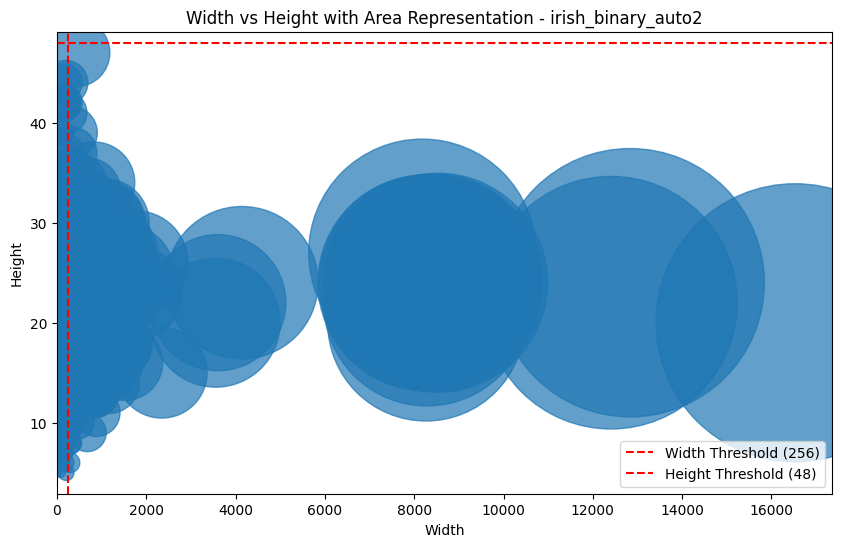

Amount of files with width greater than 256: 2464 or 24.73%
Amount of files with height greater than 48: 0 or 0.00%


In [8]:
import matplotlib.pyplot as plt

# Assuming the scatter plot code and necessary variables (widths, heights, area_sizes) are already defined above

# Plot the scatter plot again for context
plt.figure(figsize=(10, 6))
plt.scatter(widths, heights, s=area_sizes, alpha=0.7)
plt.title(f'Width vs Height with Area Representation - {np_convert_dir}')
plt.xlabel('Width')
plt.ylabel('Height')

# Define your thresholds
width_threshold = 256  # Adjust this value for width as needed
height_threshold = 48  # Adjust this value for height as needed

# Draw red rulers at the threshold values
plt.axvline(x=width_threshold, color='r', linestyle='--', label=f'Width Threshold ({width_threshold})')
plt.axhline(y=height_threshold, color='r', linestyle='--', label=f'Height Threshold ({height_threshold})')

# Add a legend to clarify the plot
plt.legend()

# Set the x-axis to start at 0
plt.xlim(0, None)

plt.show()

# Initialize counters for files exceeding the respective thresholds
files_above_width_threshold = 0
files_above_height_threshold = 0

# Iterate and count files exceeding each threshold
for file_name, dimensions in zip(file_names, dimension_data):
    width, height = dimensions[1], dimensions[0]
    
    if width > width_threshold:
        files_above_width_threshold += 1
        
    if height > height_threshold:
        files_above_height_threshold += 1

# Calculate and print the percentages of files filtered out by each threshold
total_files = len(dimension_data)
percentage_filtered_by_width = (files_above_width_threshold / total_files) * 100
percentage_filtered_by_height = (files_above_height_threshold / total_files) * 100

print(f"Amount of files with width greater than {width_threshold}: {files_above_width_threshold} or {percentage_filtered_by_width:.2f}%")
print(f"Amount of files with height greater than {height_threshold}: {files_above_height_threshold} or {percentage_filtered_by_height:.2f}%")
